<h1 style="font-size:36px;">Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of multiple data files is shown</h2>

link: https://physionet.org/content/inspire/0.1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels
import ipywidgets as widgets
import ipympl
%matplotlib widget


print("Libraries Imported")



Libraries Imported


In [2]:

df_labs_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\labs.csv')
df_labs = df_labs_original.copy()

In [3]:
df_medications_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\medications.csv')
df_medications  = df_medications_original.copy()

In [4]:
df_operations_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\operations.csv')
df_operations = df_operations_original.copy()

In [5]:
df_diagnosis_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\diagnosis.csv')
df_diagnosis = df_diagnosis_original.copy()

In [6]:
df_vitals_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\vitals.csv')
df_vitals = df_vitals_original.copy()

In [7]:
df_ward_vitals_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\ward_vitals.csv')
df_ward_vitals = df_ward_vitals_original.copy()

In [8]:
df_vitalDB_clinical_data_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\\clinical_data.csv')
df_vitalDB_clinical_data = df_vitalDB_clinical_data_original.copy()

In [9]:
df_vitalDB_lab_data_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\\lab_data.csv')
df_vitalDB_lab_data = df_vitalDB_lab_data_original.copy()

In [10]:
def count_deceased_patients(df):
    # Count the number of times 1 appears in the 'hospital_death' column.
    death_count = df['inhosp_death_time'].count()
    return death_count

print(count_deceased_patients(df=df_operations))

1581


In [11]:
def get_deceased_patients_with_valid_case_id(df):
    # Filter out rows where 'inhosp_death_time' is not NaN and 'case_id' is not NaN
    deceased_patients_with_case_id = df[df['inhosp_death_time'].notna() & df['case_id'].notna()][['subject_id', 'case_id']]
    return deceased_patients_with_case_id

print(get_deceased_patients_with_valid_case_id(df=df_operations))

        subject_id  case_id
71977    137233090   6550.0
71978    160969360   6551.0
72839    118309453   6800.0
72992    137233090   6849.0
73162    166480854   6894.0
...            ...      ...
114689   199138581 -15311.0
114812   144832031 -16277.0
114815   149564794 -15303.0
115394   170236654 -16754.0
115434   129082821 -16683.0

[281 rows x 2 columns]


In [12]:
def print_patient_case_id(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extract and print the case_id if it exists
    if 'case_id' in df.columns:
        case_id_data = patient_data['case_id'].dropna()
        if not case_id_data.empty:
            print(f"case_id for subject_id {subject_id}: {case_id_data.values}")
        else:
            print(f"No case_id information found for subject_id {subject_id}")
    else:
        print(f"The DataFrame does not contain a 'case_id' column.")

# Example usage:
print_patient_case_id(df=df_operations, subject_id=7000)

No case_id information found for subject_id 7000


Get a subject_id in INSPIRE that has a case_id to connect to VitalDB

case id 1–6090

In [13]:
def find_subject_id_by_case_id(df, case_id):
    # Filter the DataFrame for the given case_id
    subject_data = df[df['case_id'] == case_id]
    
    # Get the subject_id(s) associated with the case_id
    subject_ids = subject_data['subject_id'].unique()
    
    return subject_ids

# Example usage:
case_id = 6000 # Replace with the case_id you're looking for
subject_ids = find_subject_id_by_case_id(df_operations, case_id)
print(f"Subject IDs associated with case_id {case_id}: {subject_ids}")


Subject IDs associated with case_id 6000: [191518470]


Data Analysis of a specific patient

In [14]:
#choose a specific patient id
patient_id = 191518470 #122395942 #190057952 #101406342 #147986980 #116535603 #107328754 #185630683 #123174350 104192463  # 

In [15]:
#choose a corresponding case_id to connect to VitalDB
case_id=6000

remarks on patients:
-107328754 deteriorated and died after 28 days at icu, no VitalDB

VitalDB clinical data

In [16]:
def print_complete_patient_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['caseid'] == subject_id]
    
    # Extracting and printing all relevant information
    for column in df.columns:
        column_data = patient_data[column].dropna()
        if not column_data.empty:
            print(f"{column} for subject_id {subject_id}: {column_data.values}")
        else:
            print(f"No {column} information found for subject_id {subject_id}")

# Example usage for the new dataset:
print_complete_patient_details(df=df_vitalDB_clinical_data, subject_id=case_id)



caseid for subject_id 6000: [6000]
subjectid for subject_id 6000: [1064]
casestart for subject_id 6000: [0]
caseend for subject_id 6000: [24403]
anestart for subject_id 6000: [-2257]
aneend for subject_id 6000: [24263.]
opstart for subject_id 6000: [1763]
opend for subject_id 6000: [23663]
adm for subject_id 6000: [-393300]
dis for subject_id 6000: [2544300]
icu_days for subject_id 6000: [0]
death_inhosp for subject_id 6000: [0]
age for subject_id 6000: ['60']
sex for subject_id 6000: ['M']
height for subject_id 6000: [154.]
weight for subject_id 6000: [41.]
bmi for subject_id 6000: [17.3]
asa for subject_id 6000: [2.]
emop for subject_id 6000: [0]
department for subject_id 6000: ['General surgery']
optype for subject_id 6000: ['Stomach']
dx for subject_id 6000: ['Advanced gastric cancer']
opname for subject_id 6000: ['Total gastrectomy']
approach for subject_id 6000: ['Videoscopic']
position for subject_id 6000: ['Supine']
ane_type for subject_id 6000: ['General']
preop_htn for subjec

INSPIRE operations

In [17]:
def print_complete_patient_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting and printing all relevant information
    for column in df.columns:
        column_data = patient_data[column].dropna()
        if not column_data.empty:
            print(f"{column} for subject_id {subject_id}: {column_data.values}")
        else:
            print(f"No {column} information found for subject_id {subject_id}")

# Example usage:
print_complete_patient_details(df=df_operations, subject_id=patient_id)


op_id for subject_id 191518470: [499704019]
subject_id for subject_id 191518470: [191518470]
hadm_id for subject_id 191518470: [211022591]
case_id for subject_id 191518470: [6000.]
opdate for subject_id 191518470: [5760]
age for subject_id 191518470: [60]
sex for subject_id 191518470: ['M']
weight for subject_id 191518470: [42.]
height for subject_id 191518470: [155.]
race for subject_id 191518470: ['Asian']
asa for subject_id 191518470: [2.]
emop for subject_id 191518470: [0]
department for subject_id 191518470: ['GS']
antype for subject_id 191518470: ['General']
icd10_pcs for subject_id 191518470: ['0DB60']
orin_time for subject_id 191518470: [6520]
orout_time for subject_id 191518470: [6960]
opstart_time for subject_id 191518470: [6585.]
opend_time for subject_id 191518470: [6955.]
admission_time for subject_id 191518470: [0]
discharge_time for subject_id 191518470: [50395]
anstart_time for subject_id 191518470: [6555.]
anend_time for subject_id 191518470: [6955.]
No cpbon_time info

In [18]:
#return

In [19]:
def print_total_durations(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]

    # Helper function to calculate duration in minutes
    def calculate_duration(start_minutes, end_minutes):
        durations = []
        for start, end in zip(start_minutes, end_minutes):
            if pd.notnull(start) and pd.notnull(end):
                duration = end - start
                # Ensure that duration is not negative
                if duration >= 0:
                    durations.append(duration)
        return sum(durations)

    # Define the time columns for each event
    time_columns = {
        'ICU': ('icuin_time', 'icuout_time'),
        'CPB': ('cpbon_time', 'cpboff_time'),
        'Anesthesia': ('anstart_time', 'anend_time'),
        'Operation': ('opstart_time', 'opend_time'),
        'Operation Room': ('orin_time', 'orout_time'),
    }

    # Calculate and print total times for each event
    for event, (start_col, end_col) in time_columns.items():
        if start_col in df.columns and end_col in df.columns:
            start_times = patient_data[start_col].fillna(0)
            end_times = patient_data[end_col].fillna(0)
            duration = calculate_duration(start_times, end_times)
            # Convert total duration from minutes to a readable format (hours and minutes)
            hours = duration // 60
            minutes = duration % 60
            print(f"Total {event} time for subject_id {subject_id}: {hours} hours and {minutes} minutes")
        else:
            print(f"{event} time columns are not found in the DataFrame.")

# Example usage:
print_total_durations(df=df_operations, subject_id=patient_id)


Total ICU time for subject_id 191518470: 0.0 hours and 0.0 minutes
Total CPB time for subject_id 191518470: 0.0 hours and 0.0 minutes
Total Anesthesia time for subject_id 191518470: 6.0 hours and 40.0 minutes
Total Operation time for subject_id 191518470: 6.0 hours and 10.0 minutes
Total Operation Room time for subject_id 191518470: 7 hours and 20 minutes


INSPIRE medications

In [20]:
def print_patient_medication_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting and printing all relevant information
    for column in df.columns:
        column_data = patient_data[column].dropna()
        if not column_data.empty:
            print(f"{column} for subject_id {subject_id}: {column_data.values}")
        else:
            print(f"No {column} information found for subject_id {subject_id}")

# Example usage:
print_patient_medication_details(df=df_medications, subject_id=patient_id)


subject_id for subject_id 191518470: [191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470]
chart_time for subject_id 191518470: [49440 42180 40740 41400 38520 34970 33540 29880  8940  9300  9660  9960
  7860  8460  7040  4740  5340 46800 47160 39300 39360 39720 35040 35280
 32100 30660  9300  7500  7860  8220  8510  6550  6150 48240 48600 36720
 37080 33600 33840 34200 32160 32400 32760 30720 30960 31320 10380 10740
 11100 11400  7860  4860  5640  4860]
drug_name for subject_id 191518470: ['metformin

In [21]:
patient_medication = df_medications[df_medications['subject_id'] == patient_id]

# Check if any medications were found
if not patient_medication.empty:
    print(f"Medications for patient {patient_id}:")
    print(patient_medication)
else:
    print(f"No medications found for patient {patient_id}.")


Medications for patient 191518470:
         subject_id  chart_time          drug_name route
1053706   191518470       49440          metformin    po
1053707   191518470       42180   insulin glargine    iv
1053708   191518470       40740   insulin glargine    iv
1053709   191518470       41400  insulin glulisine    iv
1053710   191518470       38520  insulin glulisine    iv
1053711   191518470       34970   insulin glargine    iv
1053712   191518470       33540   insulin glargine    iv
1053713   191518470       29880  insulin glulisine    iv
1053714   191518470        8940           ambroxol    iv
1053715   191518470        9300           ambroxol    iv
1053716   191518470        9660           ambroxol    iv
1053717   191518470        9960           ambroxol    iv
1053718   191518470        7860          cefotetan    iv
1053719   191518470        8460          cefotetan    iv
1053720   191518470        7040           ambroxol    iv
1053721   191518470        4740          rifaximin   

In [22]:
patient_medication = df_medications[df_medications['subject_id'] == patient_id]
med_count = patient_medication['drug_name'].nunique()
print(f"Patient {patient_id} is taking {med_count} unique medications.")

Patient 191518470 is taking 9 unique medications.


In [23]:
patient_medication = df_medications[df_medications['subject_id'] == patient_id]
freq_table = patient_medication['drug_name'].value_counts()
print(f"Frequency of medications for patient {patient_id}:\n{freq_table}")

Frequency of medications for patient 191518470:
drug_name
insulin glulisine    18
ambroxol             13
insulin glargine      7
metformin             5
cefotetan             3
bisacodyl             3
rifaximin             2
enoxaparine           2
thioglycolic acid     1
Name: count, dtype: int64


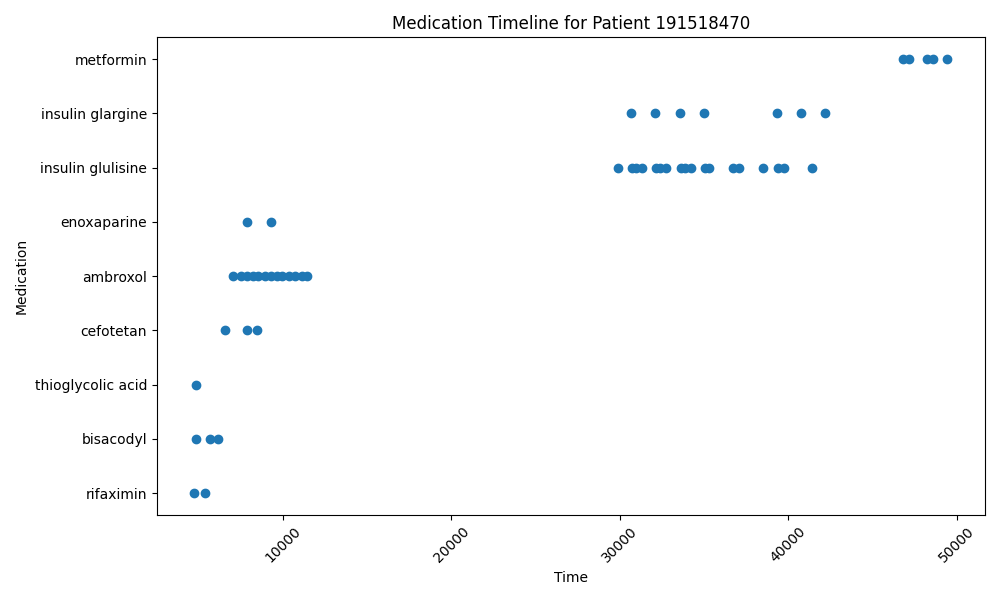

In [24]:
patient_medication = df_medications[df_medications['subject_id'] == patient_id]
    
# Convert chart_time to datetime for plotting (assuming UNIX timestamp format)
#patient_medication['chart_time'] = pd.to_datetime(patient_medication['chart_time'], unit='min')

# Sort by chart_time
patient_medication = patient_medication.sort_values(by='chart_time')

plt.figure(figsize=(10, 6))
plt.scatter(patient_medication['chart_time'], patient_medication['drug_name'])
plt.xlabel('Time')
plt.ylabel('Medication')
plt.title(f"Medication Timeline for Patient {patient_id}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
threshold = 4
patient_medication = df_medications[df_medications['subject_id'] == patient_id]
unique_drugs = patient_medication['drug_name'].nunique()
if unique_drugs > threshold:
    print(f"Patient {patient_id} is on {unique_drugs} different medications, which may indicate polypharmacy.")
else:
    print(f"Patient {patient_id} is below the polypharmacy threshold with {unique_drugs} different medications.")


Patient 191518470 is on 9 different medications, which may indicate polypharmacy.


INSPIRE labs



In [26]:
def print_patient_medication_details(df, subject_id):
    # Filter the DataFrame for the given subject_id
    patient_data = df[df['subject_id'] == subject_id]
    
    # Extracting and printing all relevant information
    for column in df.columns:
        column_data = patient_data[column].dropna()
        if not column_data.empty:
            print(f"{column} for subject_id {subject_id}: {column_data.values}")
        else:
            print(f"No {column} information found for subject_id {subject_id}")

# Example usage:
print_patient_medication_details(df=df_labs, subject_id=patient_id)


subject_id for subject_id 191518470: [191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470 191518470 191518470 191518470
 191518470 191518470 191518470 191518470

In [27]:
def print_patient_labs(subject_id, df):
    patient_labs = df_labs[df_labs['subject_id'] == subject_id]
    sorted_labs = patient_labs.sort_values(by='chart_time')
    print(f"Lab results for patient {subject_id}:")
    for index, row in sorted_labs.iterrows():
        time = row['chart_time']
        test = row['item_name']
        value = row['value']
        print(f"Time: {time}, Test: {test}, Value: {value}")

# Example usage:
print_patient_labs(subject_id=patient_id, df=df_labs) 

Lab results for patient 191518470:
Time: -173590, Test: potassium, Value: 5.2
Time: -173590, Test: phosphorus, Value: 3.7
Time: -173590, Test: total_protein, Value: 6.9
Time: -173590, Test: total_bilirubin, Value: 0.5
Time: -173590, Test: bun, Value: 19.0
Time: -173590, Test: albumin, Value: 4.0
Time: -173590, Test: ast, Value: 12.0
Time: -173590, Test: alt, Value: 10.0
Time: -173590, Test: creatinine, Value: 0.71
Time: -173590, Test: sodium, Value: 140.0
Time: -173590, Test: calcium, Value: 9.9
Time: -173590, Test: glucose, Value: 130.0
Time: -173590, Test: alp, Value: 99.0
Time: -173590, Test: chloride, Value: 101.0
Time: -68105, Test: hct, Value: 39.4
Time: -68105, Test: phosphorus, Value: 2.9
Time: -68105, Test: total_protein, Value: 6.3
Time: -68105, Test: total_bilirubin, Value: 0.4
Time: -68105, Test: lymphocyte, Value: 35.0
Time: -68105, Test: alp, Value: 85.0
Time: -68105, Test: calcium, Value: 9.0
Time: -68105, Test: rbc, Value: 4.59
Time: -68105, Test: wbc, Value: 6.35
Time:

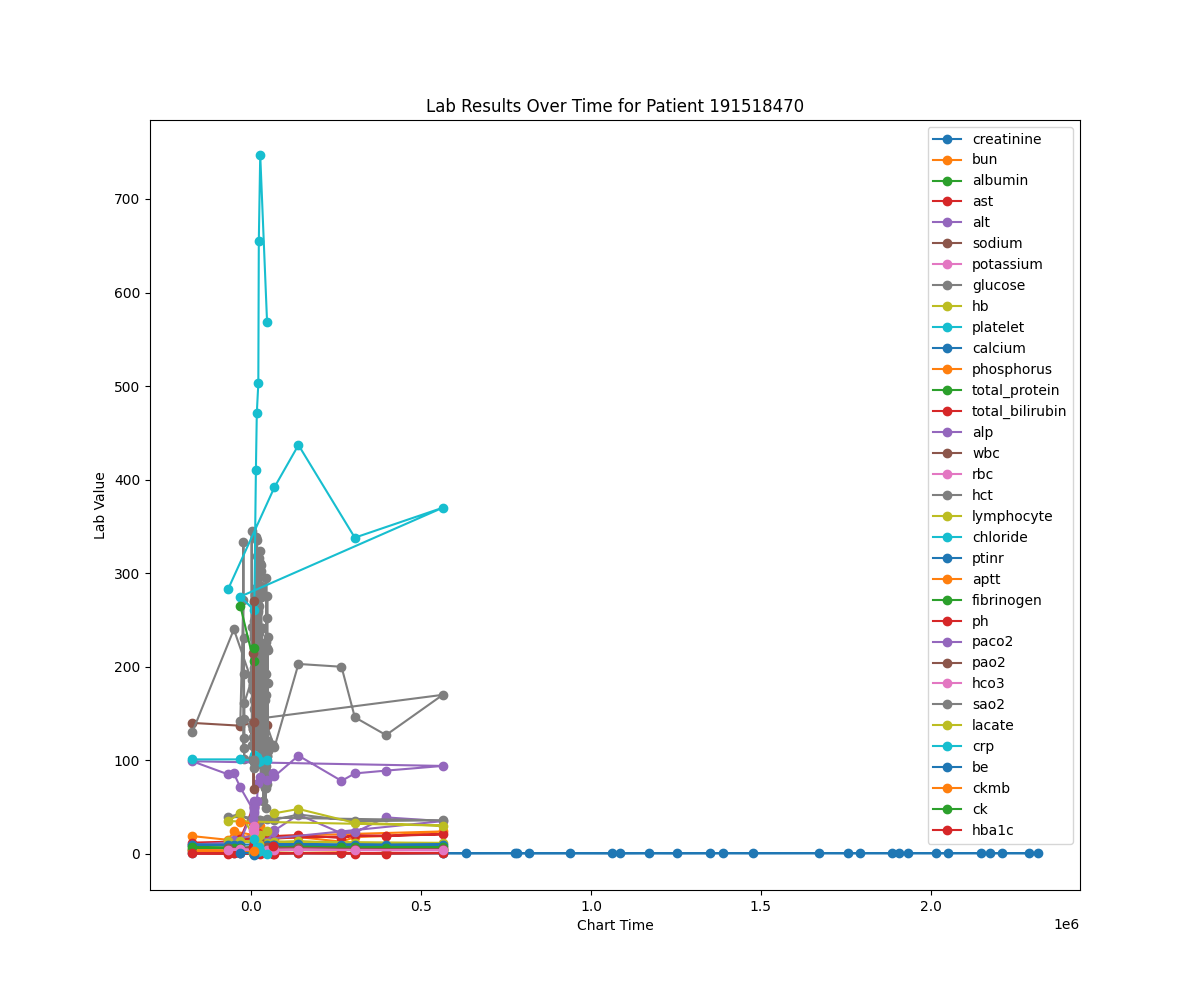

In [28]:
patient_labs = df_labs[df_labs['subject_id'] == patient_id]
lab_tests = patient_labs['item_name'].unique()
plt.figure(figsize=(12, 10))

for test in lab_tests:
    test_data = patient_labs[patient_labs['item_name'] == test]
    plt.plot(test_data['chart_time'], test_data['value'], marker='o', label=test)

plt.xlabel('Chart Time')
plt.ylabel('Lab Value')
plt.title(f'Lab Results Over Time for Patient {patient_id}')
plt.legend()
plt.show()

In [29]:

# Filter the DataFrame for the specific patient_id
patient_labs = df_labs[df_labs['subject_id'] == patient_id]

# Print the unique lab tests available for the specific patient
unique_tests = patient_labs['item_name'].unique()
print(f"Unique lab tests for patient_id {patient_id}: {unique_tests}")

# Descriptive statistics for each lab test for the specific patient
for test in unique_tests:
    print(f"\nStatistics for {test} for patient_id {patient_id}:")
    print(patient_labs[patient_labs['item_name'] == test]['value'].describe())

# Check for missing values in the dataset for the specific patient
missing_values = patient_labs.isnull().sum()
print(f"\nMissing values in each column for patient_id {patient_id}:\n{missing_values}")


Unique lab tests for patient_id 191518470: ['creatinine' 'bun' 'albumin' 'ast' 'alt' 'sodium' 'potassium' 'glucose'
 'hb' 'platelet' 'calcium' 'phosphorus' 'total_protein' 'total_bilirubin'
 'alp' 'wbc' 'rbc' 'hct' 'lymphocyte' 'chloride' 'ptinr' 'aptt'
 'fibrinogen' 'ph' 'paco2' 'pao2' 'hco3' 'sao2' 'lacate' 'crp' 'be' 'ckmb'
 'ck' 'hba1c']

Statistics for creatinine for patient_id 191518470:
count    48.000000
mean      0.635625
std       0.077923
min       0.430000
25%       0.580000
50%       0.655000
75%       0.702500
max       0.760000
Name: value, dtype: float64

Statistics for bun for patient_id 191518470:
count    18.000000
mean     18.944444
std       4.819961
min      13.000000
25%      15.250000
50%      18.000000
75%      19.750000
max      30.000000
Name: value, dtype: float64

Statistics for albumin for patient_id 191518470:
count    18.000000
mean      3.766667
std       0.533578
min       3.000000
25%       3.250000
50%       3.900000
75%       4.175000
max       4.80

In [30]:

# thresholds should be a dictionary with lab item_name as keys and a tuple (low, high) as the range of normal values
thresholds = {
    'glucose': (70, 140),  # Replace with actual clinical standards
    'sodium': (135, 145),  # Replace with actual clinical standards
    # Add more tests and their ranges as needed
}

# Filter the DataFrame for the specific patient_id
patient_labs = df_labs[df_labs['subject_id'] == patient_id]

for test, (low, high) in thresholds.items():
    # Find abnormal values for each test for the specific patient
    abnormal = patient_labs[(patient_labs['item_name'] == test) & 
                            ((patient_labs['value'] < low) | (patient_labs['value'] > high))]
    print(f"Abnormal values for {test} for patient_id {patient_id}:")
    print(abnormal[['subject_id', 'item_name', 'value']] if not abnormal.empty else f"No abnormal values for {test}")

Abnormal values for glucose for patient_id 191518470:
          subject_id item_name  value
9994988    191518470   glucose  240.0
9995022    191518470   glucose  203.0
9995033    191518470   glucose  200.0
9995050    191518470   glucose  146.0
9995078    191518470   glucose  170.0
...              ...       ...    ...
20241652   191518470   glucose  218.0
20241653   191518470   glucose  276.0
20241656   191518470   glucose  218.0
20241657   191518470   glucose  183.0
20241658   191518470   glucose  232.0

[108 rows x 3 columns]
Abnormal values for sodium for patient_id 191518470:
          subject_id item_name  value
20241356   191518470    sodium  134.0
20241367   191518470    sodium  132.0
20241378   191518470    sodium  131.0


VitalDB labs

In [31]:
def print_patient_lab_details(df, caseid):
    # Filter the DataFrame for the given caseid
    patient_data = df[df['caseid'] == caseid]
    
    # Extracting and printing all relevant information
    for column in df.columns:
        column_data = patient_data[column].dropna()
        if not column_data.empty:
            print(f"{column} for caseid {caseid}: {column_data.values}")
        else:
            print(f"No {column} information found for caseid {caseid}")

# Example usage:
# Replace 'patient_id' with the actual caseid you want to query
caseid = 123456  # Replace with the actual caseid
print_patient_lab_details(df=df_vitalDB_lab_data, caseid=case_id)

caseid for caseid 6000: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000 6000
 6000 6000 6000 6000 6000 6000 6000 6000 6000]
dt for caseid 6000: [  24359  153916  585899 1191207  426938  845428 2401551 2401551  585899
  426938  845428 1191207  153916   24359   24355  42693

In [32]:
def print_patient_labs(caseid, df):
    # Filter the DataFrame for the given caseid
    patient_labs = df[df['caseid'] == caseid]
    sorted_labs = patient_labs.sort_values(by='dt')
    print(f"Lab results for case {caseid}:")
    for index, row in sorted_labs.iterrows():
        time = row['dt']  # Assuming 'dt' is the column for the datetime of the lab test
        test = row['name']  # Assuming 'name' is the column for the name of the lab test
        value = row['result']  # Assuming 'result' is the column for the result of the lab test
        print(f"Time: {time}, Test: {test}, Value: {value}")

print_patient_labs(caseid=case_id, df=df_vitalDB_lab_data)

Lab results for case 6000:
Time: -54473, Test: k, Value: 4.3
Time: -54473, Test: na, Value: 140.0
Time: -54473, Test: cl, Value: 100.0
Time: 1589, Test: po2, Value: 215.0
Time: 1589, Test: ica, Value: 1.09
Time: 1589, Test: ph, Value: 7.45
Time: 1589, Test: hct, Value: 33.0
Time: 1589, Test: k, Value: 3.4
Time: 1589, Test: lac, Value: 0.9
Time: 1589, Test: gluc, Value: 186.0
Time: 1589, Test: na, Value: 134.0
Time: 1589, Test: sao2, Value: 100.0
Time: 1589, Test: hco3, Value: 25.7
Time: 1589, Test: pco2, Value: 37.0
Time: 17005, Test: hct, Value: 34.0
Time: 17005, Test: hco3, Value: 30.1
Time: 17005, Test: gluc, Value: 155.0
Time: 17005, Test: pco2, Value: 57.0
Time: 17005, Test: po2, Value: 69.0
Time: 17005, Test: lac, Value: 0.5
Time: 17005, Test: sao2, Value: 92.0
Time: 17005, Test: na, Value: 132.0
Time: 17005, Test: ph, Value: 7.33
Time: 17005, Test: ica, Value: 1.17
Time: 17005, Test: k, Value: 3.6
Time: 18517, Test: pco2, Value: 50.0
Time: 18517, Test: gluc, Value: 165.0
Time: 1

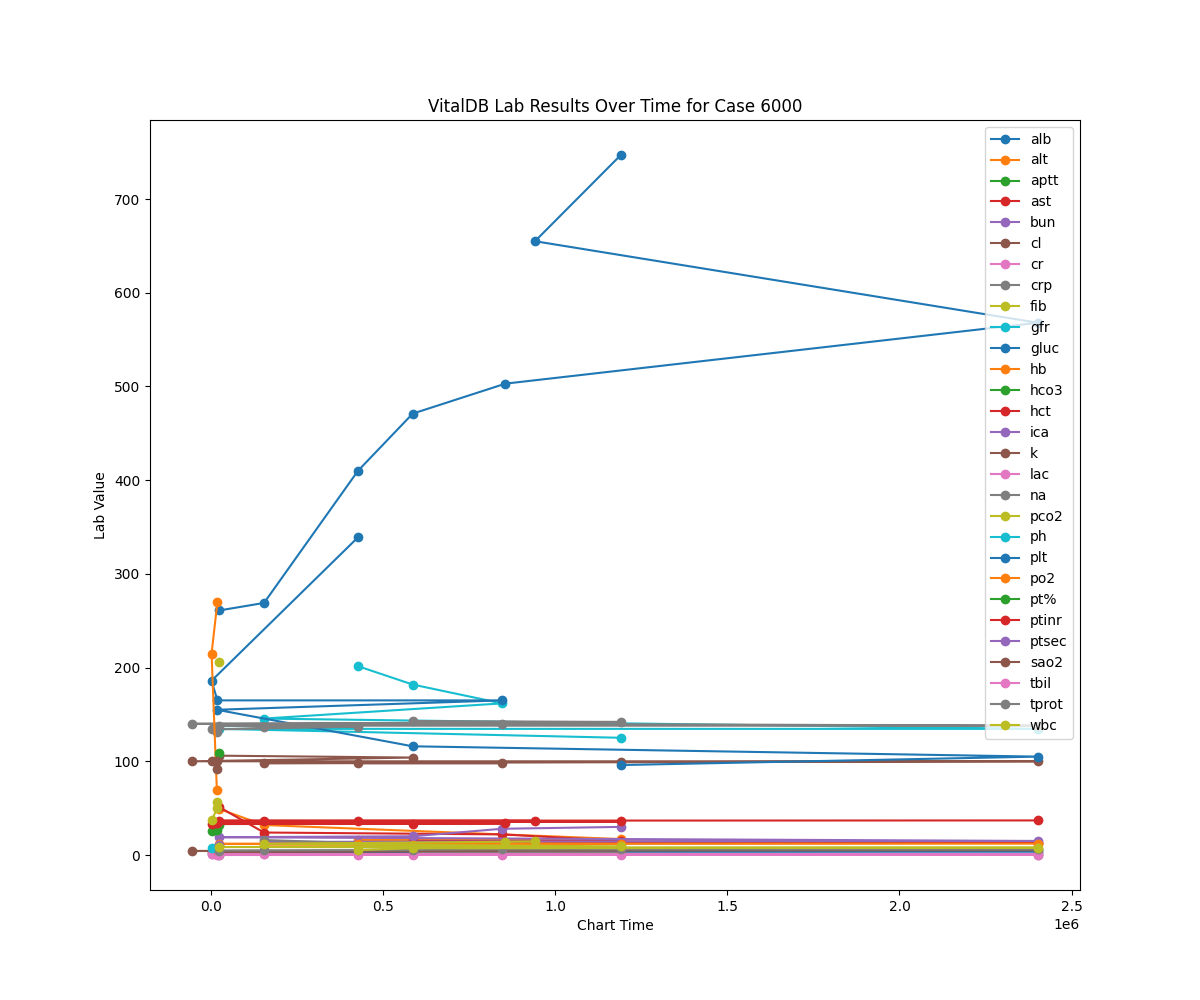

In [33]:
def plot_patient_labs(caseid, df):
    # Filter the DataFrame for the given caseid
    patient_labs = df[df['caseid'] == caseid]
    lab_tests = patient_labs['name'].unique()
    plt.figure(figsize=(12, 10))

    for test in lab_tests:
        test_data = patient_labs[patient_labs['name'] == test]
        plt.plot(test_data['dt'], test_data['result'], marker='o', label=test)

    plt.xlabel('Chart Time')
    plt.ylabel('Lab Value')
    plt.title(f'VitalDB Lab Results Over Time for Case {caseid}')
    plt.legend()
    plt.show()


plot_patient_labs(case_id, df_vitalDB_lab_data)

In [34]:
def print_patient_lab_statistics(caseid, df):
    # Filter the DataFrame for the specific caseid
    patient_labs = df[df['caseid'] == caseid]

    # Print the unique lab tests available for the specific case
    unique_tests = patient_labs['name'].unique()
    print(f"Unique lab tests for caseid {caseid}: {unique_tests}")

    # Descriptive statistics for each lab test for the specific case
    for test in unique_tests:
        print(f"\nStatistics for {test} for caseid {caseid}:")
        print(patient_labs[patient_labs['name'] == test]['result'].describe())

    # Check for missing values in the dataset for the specific case
    missing_values = patient_labs.isnull().sum()
    print(f"\nMissing values in each column for caseid {caseid}:\n{missing_values}")


print_patient_lab_statistics(case_id, df_vitalDB_lab_data)

Unique lab tests for caseid 6000: ['alb' 'alt' 'aptt' 'ast' 'bun' 'cl' 'cr' 'crp' 'fib' 'gfr' 'gluc' 'hb'
 'hco3' 'hct' 'ica' 'k' 'lac' 'na' 'pco2' 'ph' 'plt' 'po2' 'pt%' 'ptinr'
 'ptsec' 'sao2' 'tbil' 'tprot' 'wbc']

Statistics for alb for caseid 6000:
count    7.000000
mean     3.185714
std      0.195180
min      3.000000
25%      3.050000
50%      3.100000
75%      3.300000
max      3.500000
Name: result, dtype: float64

Statistics for alt for caseid 6000:
count     7.000000
mean     22.714286
std      13.174651
min      13.000000
25%      15.500000
50%      17.000000
75%      24.500000
max      49.000000
Name: result, dtype: float64

Statistics for aptt for caseid 6000:
count     1.0
mean     32.2
std       NaN
min      32.2
25%      32.2
50%      32.2
75%      32.2
max      32.2
Name: result, dtype: float64

Statistics for ast for caseid 6000:
count     7.000000
mean     21.714286
std      13.683497
min      12.000000
25%      14.000000
50%      15.000000
75%      23.000000
max   

In [35]:
def print_abnormal_lab_values(caseid, df, thresholds):
    # Filter the DataFrame for the specific caseid
    patient_labs = df[df['caseid'] == caseid]

    for test, (low, high) in thresholds.items():
        # Find abnormal values for each test for the specific case
        abnormal = patient_labs[(patient_labs['name'] == test) &
                                ((patient_labs['result'] < low) | (patient_labs['result'] > high))]
        print(f"Abnormal values for {test} for caseid {caseid}:")
        print(abnormal[['caseid', 'name', 'result', 'dt']] if not abnormal.empty else f"No abnormal values for {test}")

# Example usage:
thresholds = {
    'glucose': (70, 140),  # Replace with actual clinical standards
    'sodium': (135, 145),  # Replace with actual clinical standards
    # Add more tests and their ranges as needed
}


print_abnormal_lab_values(case_id, df_vitalDB_lab_data, thresholds)

Abnormal values for glucose for caseid 6000:
No abnormal values for glucose
Abnormal values for sodium for caseid 6000:
No abnormal values for sodium


INSPIRE diagnosis

In [36]:
def extract_icd10_cm(df, patient_id):
    # Filter the DataFrame for the given patient_id
    patient_diagnoses = df[df['subject_id'] == patient_id]

    # Extract the ICD-10-CM codes
    icd10_cm_codes = patient_diagnoses['icd10_cm'].unique()
    
    return icd10_cm_codes


icd10_cm_codes = extract_icd10_cm(df_diagnosis, patient_id)
print(f"ICD-10-CM codes for patient_id {patient_id}: {icd10_cm_codes}")


ICD-10-CM codes for patient_id 191518470: ['C16' 'C61' 'E11' 'E78' 'N32' 'E14' 'N39' 'S72' 'R13' 'J18' 'R91' 'J98'
 'M81']


INSPIRE Vital

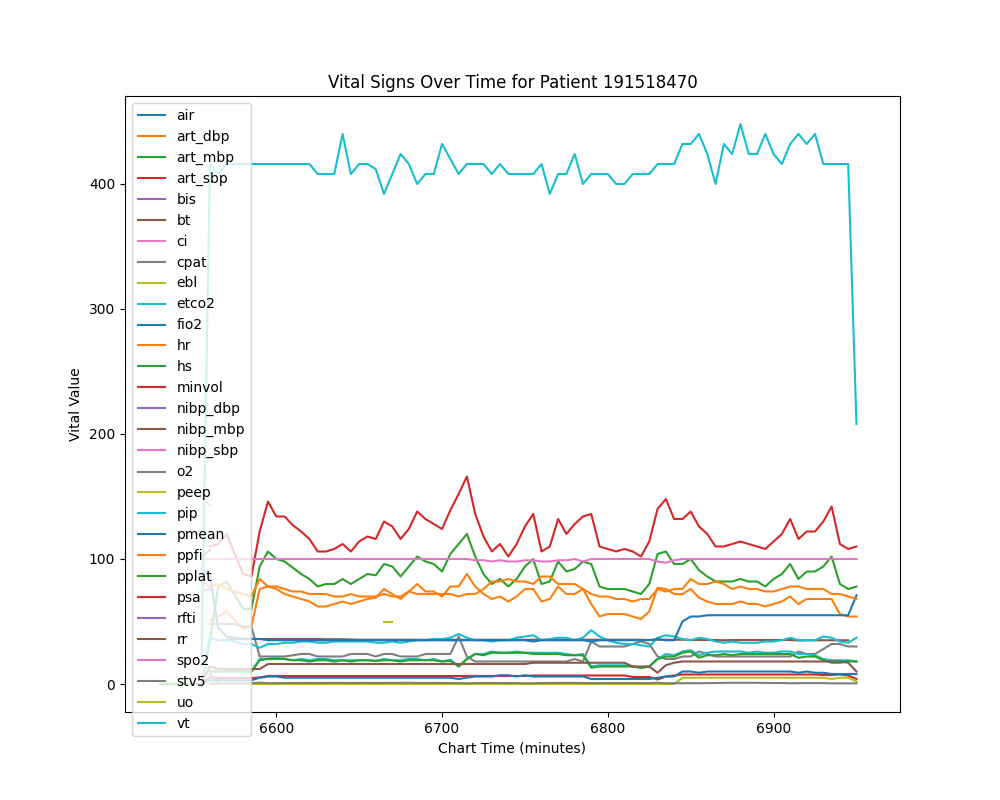

In [37]:
# Assuming df_vitals is your DataFrame
# Plot vitals for a single patient
def plot_patient_vitals(patient_id, df):
    patient_data = df[df['subject_id'] == patient_id]

    # Using pivot_table to handle duplicate entries
    # Here, you can change the 'aggfunc' to 'mean', 'sum', etc., depending on your requirement
    patient_vitals_pivot = patient_data.pivot_table(index='chart_time', columns='item_name', values='value', aggfunc='mean')

    # Plot each vital parameter
    plt.figure(figsize=(10, 8))
    for column in patient_vitals_pivot.columns:
        plt.plot(patient_vitals_pivot.index, patient_vitals_pivot[column], label=column)
    
    plt.xlabel('Chart Time (minutes)')
    plt.ylabel('Vital Value')
    plt.title(f'Vital Signs Over Time for Patient {patient_id}')
    plt.legend()
    plt.show()

# Plot vitals for a specific patient
plot_patient_vitals(patient_id, df_vitals)

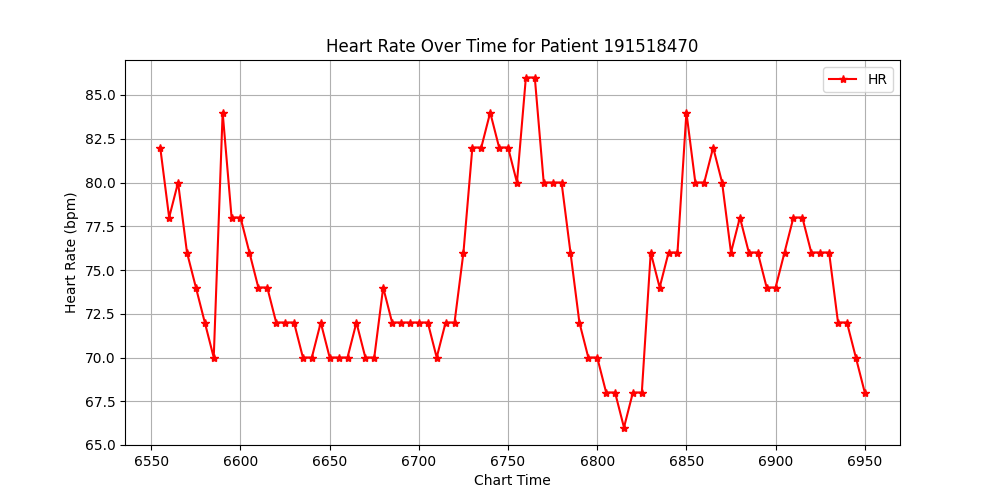

count    6.612794e+07
mean     2.081616e+05
std      6.485078e+05
min     -1.440000e+03
25%      2.260000e+03
50%      3.605000e+03
75%      9.470000e+03
max      5.185440e+06
Name: chart_time, dtype: float64


In [38]:
def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'hr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(patient_id, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

# Check for unusual 'chart_time' values
print(df_vitals['chart_time'].describe())

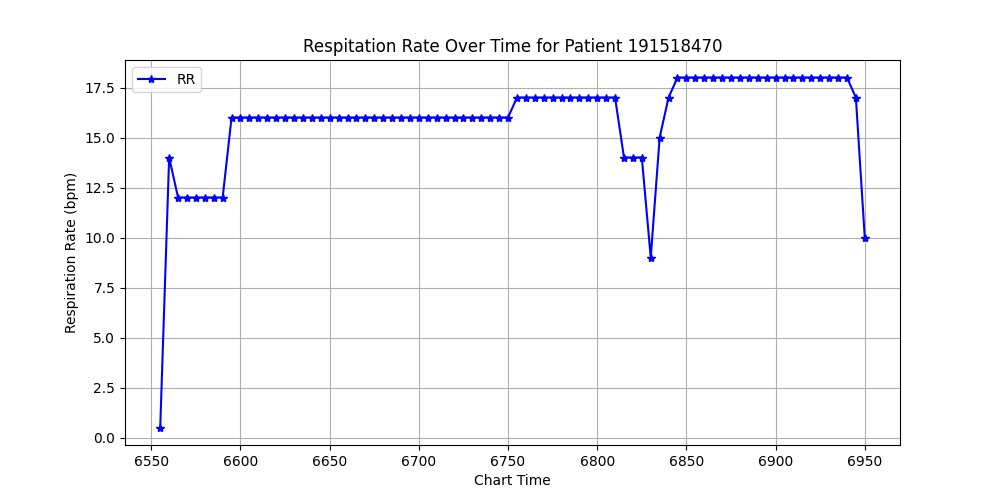

In [39]:
def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'rr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='RR', color='blue', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Respiration Rate (bpm)')
    plt.title(f'Respitation Rate Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(patient_id, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name


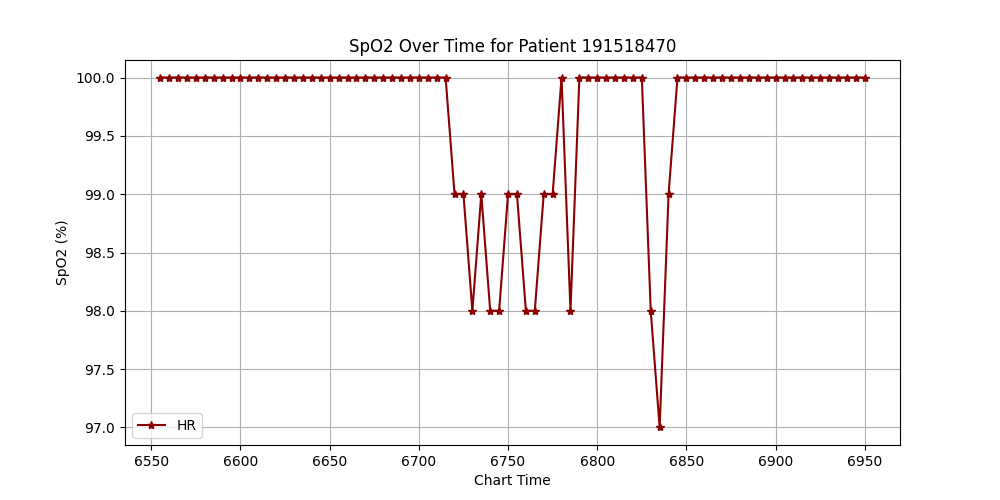

In [40]:

def plot_patient_spo2(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'spo2')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='darkred', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('SpO2 (%)')
    plt.title(f'SpO2 Over Time for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_spo2(patient_id, df_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

INSPIRE Ward Vitals

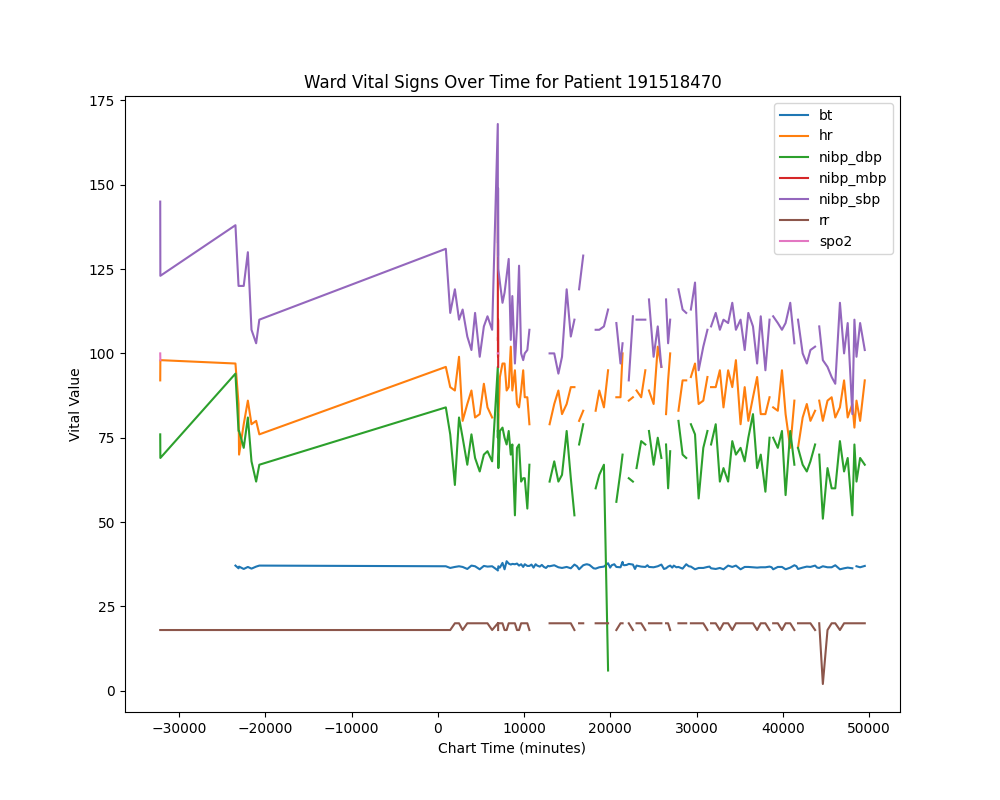

In [52]:
# Plot vitals for a single patient
def plot_patient_vitals(patient_id, df):
    patient_data = df[df['subject_id'] == patient_id]

    # Using pivot_table to handle duplicate entries
    # Here, you can change the 'aggfunc' to 'mean', 'sum', etc., depending on your requirement
    patient_vitals_pivot = patient_data.pivot_table(index='chart_time', columns='item_name', values='value', aggfunc='mean')

    # Plot each vital parameter
    plt.figure(figsize=(10, 8))
    for column in patient_vitals_pivot.columns:
        plt.plot(patient_vitals_pivot.index, patient_vitals_pivot[column], label=column)
    
    plt.xlabel('Chart Time (minutes)')
    plt.ylabel('Vital Value')
    plt.title(f'Ward Vital Signs Over Time for Patient {patient_id}')
    plt.legend()
    plt.show()

# Plot vitals for a specific patient
plot_patient_vitals(patient_id, df_ward_vitals)

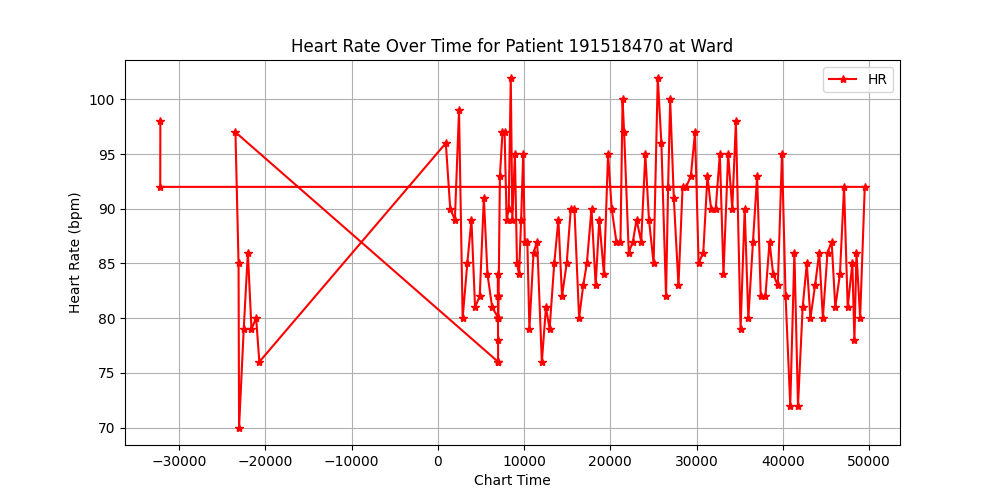

In [42]:

def plot_patient_hr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'hr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='red', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.title(f'Heart Rate Over Time for Patient {patient_id} at Ward')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_hr(patient_id, df_ward_vitals) # Replace 'df_vitals' with your actual DataFrame variable name


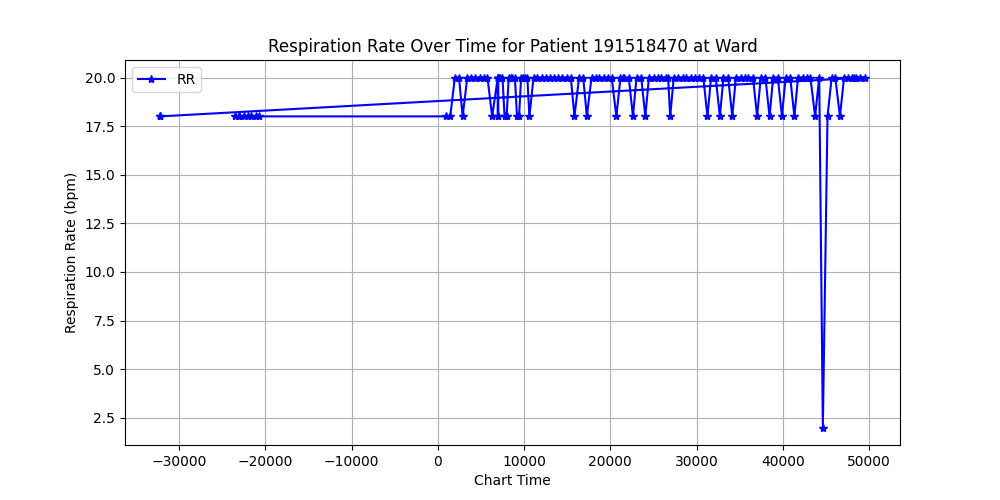

In [43]:

def plot_patient_rr(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'rr')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='RR', color='blue', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('Respiration Rate (bpm)')
    plt.title(f'Respiration Rate Over Time for Patient {patient_id} at Ward')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_rr(patient_id, df_ward_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

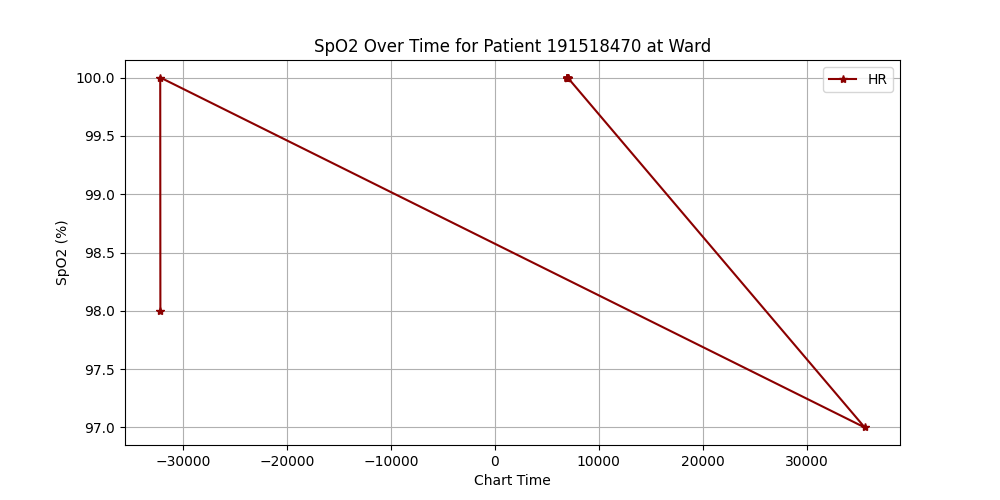

In [44]:

def plot_patient_spo2(patient_id, df):
    # Filter for the patient and the item_name 'hr' for heart rate
    patient_hr_data = df[(df['subject_id'] == patient_id) & (df['item_name'] == 'spo2')]

    # Plot heart rate
    plt.figure(figsize=(10, 5))
    plt.plot(patient_hr_data['chart_time'], patient_hr_data['value'], label='HR', color='darkred', marker='*')
    
    plt.xlabel('Chart Time')
    plt.ylabel('SpO2 (%)')
    plt.title(f'SpO2 Over Time for Patient {patient_id} at Ward')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_patient_spo2(patient_id, df_ward_vitals) # Replace 'df_vitals' with your actual DataFrame variable name

VitalDB Vitals

In [45]:
import vitaldb as vt

Vitals

[[         nan]
 [         nan]
 [         nan]
 ...
 [-10.23859978]
 [  2.00588989]
 [         nan]]
range(0, 2440191)
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2440191
<class 'numpy.ndarray'>
2440191


C:\Users\20181588\AppData\Local\Temp\ipykernel_6816\898124254.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


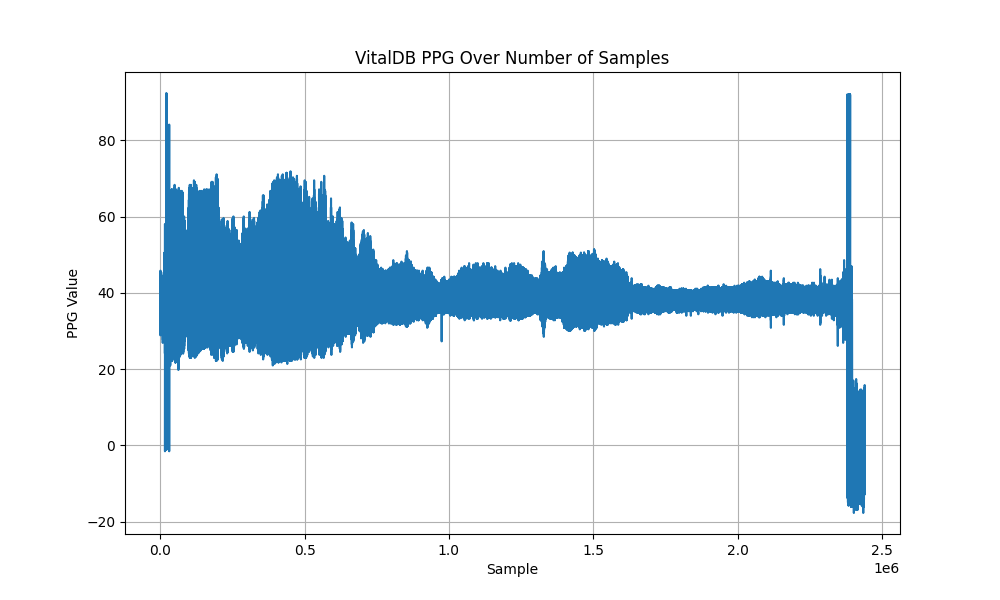

In [55]:
# Load the signal
signal_ppg = vt.load_case(case_id,['SNUADC/PLETH'], interval = 1/100)

# Generate the x values (number of samples)
samples_ppg = range(len(signal_ppg))

#print check
print(signal_ppg)
print(samples_ppg)
print(signal_ppg[:10])
print(len(signal_ppg))
print(type(signal_ppg))
print(signal_ppg.size)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(samples_ppg, signal_ppg)
plt.title("VitalDB PPG Over Number of Samples")
plt.xlabel("Sample")
plt.ylabel("PPG Value")
plt.grid(True)
plt.show()


[[        nan]
 [        nan]
 [        nan]
 ...
 [-0.21646599]
 [ 0.376008  ]
 [        nan]]
range(0, 2440191)
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2440191
<class 'numpy.ndarray'>
2440191


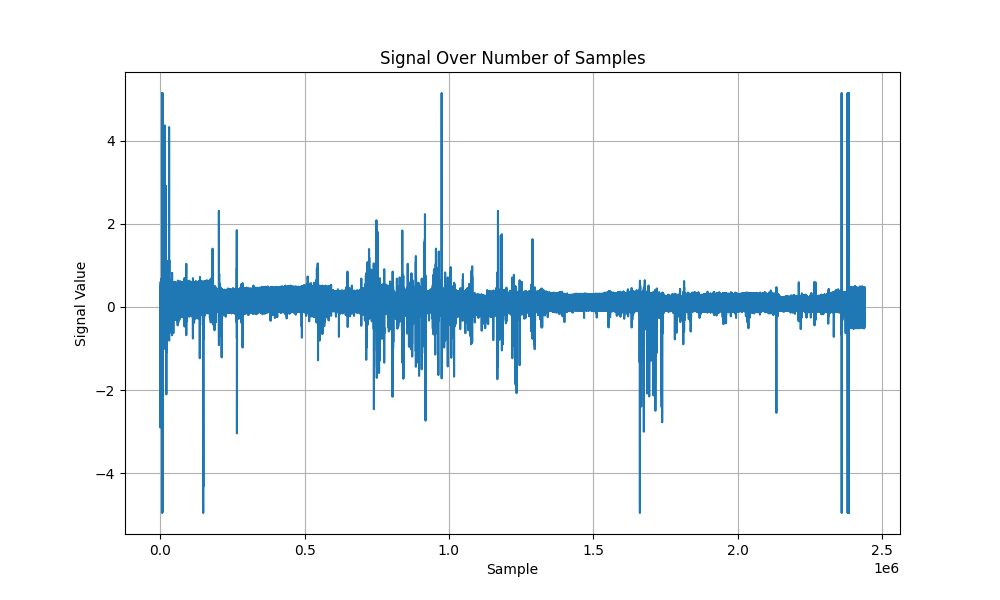

In [47]:
# Load the signal
signal_ecg = vt.load_case(case_id,['SNUADC/ECG_II'], interval = 1/100)

# Generate the x values (number of samples)
samples_ecg = range(len(signal_ecg))

#print check
print(signal_ecg)
print(samples_ecg)
print(signal_ecg[:10])
print(len(signal_ecg))
print(type(signal_ecg))
print(signal_ecg.size)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(samples_ecg, signal_ecg)
plt.title("Signal Over Number of Samples")
plt.xlabel("Sample")
plt.ylabel("Signal Value")
plt.grid(True)
plt.show()

[[87.]
 [87.]
 [84.]
 ...
 [85.]
 [86.]
 [85.]]
range(0, 2381)
[[87.]
 [87.]
 [84.]
 [86.]
 [86.]
 [82.]
 [79.]
 [78.]
 [77.]
 [80.]]
2381
<class 'numpy.ndarray'>
2381


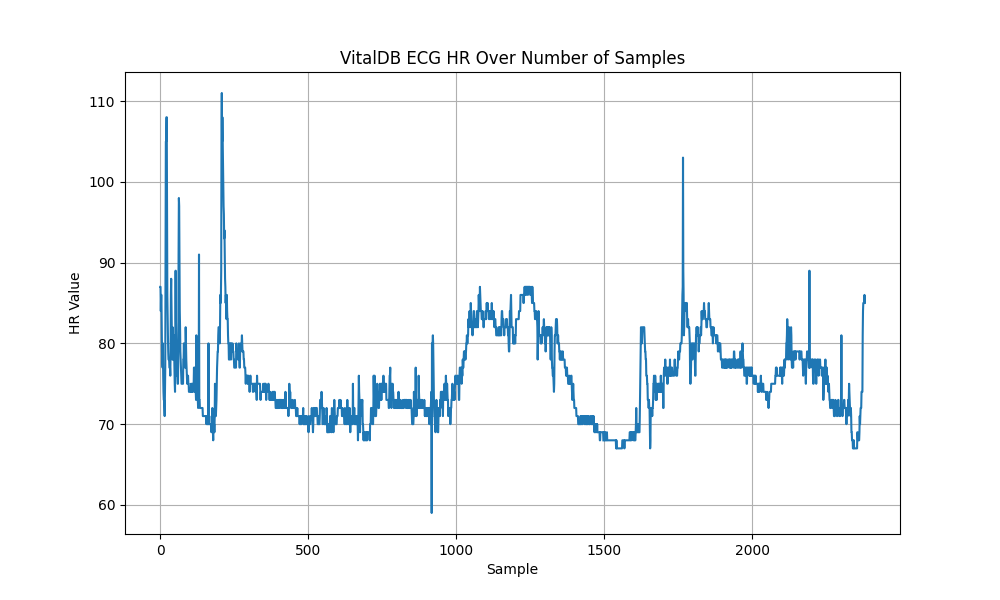

In [64]:
# Load the signal
signal_body_temp1 = vt.load_case(case_id,['Solar8000/HR'], interval = 10)

# Generate the x values (number of samples)
samples_body_temp1 = range(len(signal_body_temp1))

#print check
print(signal_body_temp1)
print(samples_body_temp1)
print(signal_body_temp1[:10])
print(len(signal_body_temp1))
print(type(signal_body_temp1))
print(signal_body_temp1.size)


# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(samples_body_temp1, signal_body_temp1)
plt.title("VitalDB ECG HR Over Number of Samples")
plt.xlabel("Sample")
plt.ylabel("HR Value")
plt.grid(True)
plt.show()


[[ 89.]
 [ 86.]
 [ 84.]
 ...
 [152.]
 [147.]
 [147.]]
range(0, 2397)
[[89.]
 [86.]
 [84.]
 [86.]
 [87.]
 [83.]
 [80.]
 [79.]
 [77.]
 [81.]]
2397
<class 'numpy.ndarray'>
2397


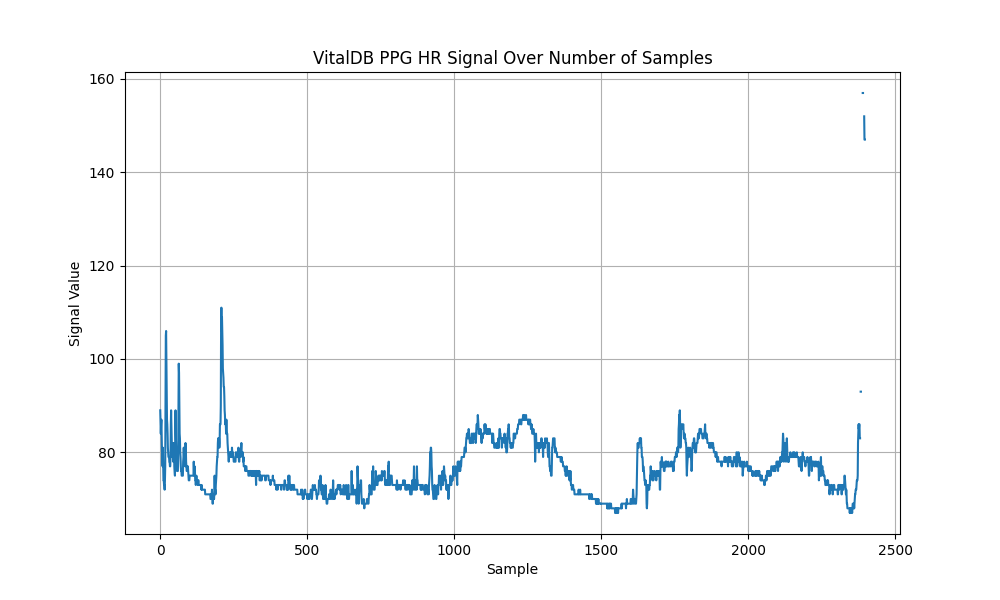

In [65]:
# Load the signal
signal_body_temp = vt.load_case(case_id,['Solar8000/PLETH_HR'], interval = 10)

# Generate the x values (number of samples)
samples_body_temp = range(len(signal_body_temp))

#print check
print(signal_body_temp)
print(samples_body_temp)
print(signal_body_temp[:10])
print(len(signal_body_temp))
print(type(signal_body_temp))
print(signal_body_temp.size)


# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(samples_body_temp, signal_body_temp)
plt.title("VitalDB PPG HR Signal Over Number of Samples")
plt.xlabel("Sample")
plt.ylabel("Signal Value")
plt.grid(True)
plt.show()


[[100.]
 [100.]
 [100.]
 ...
 [ 82.]
 [ 82.]
 [ 82.]]
range(0, 4793)
[[100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]
 [100.]]
4793
<class 'numpy.ndarray'>
4793


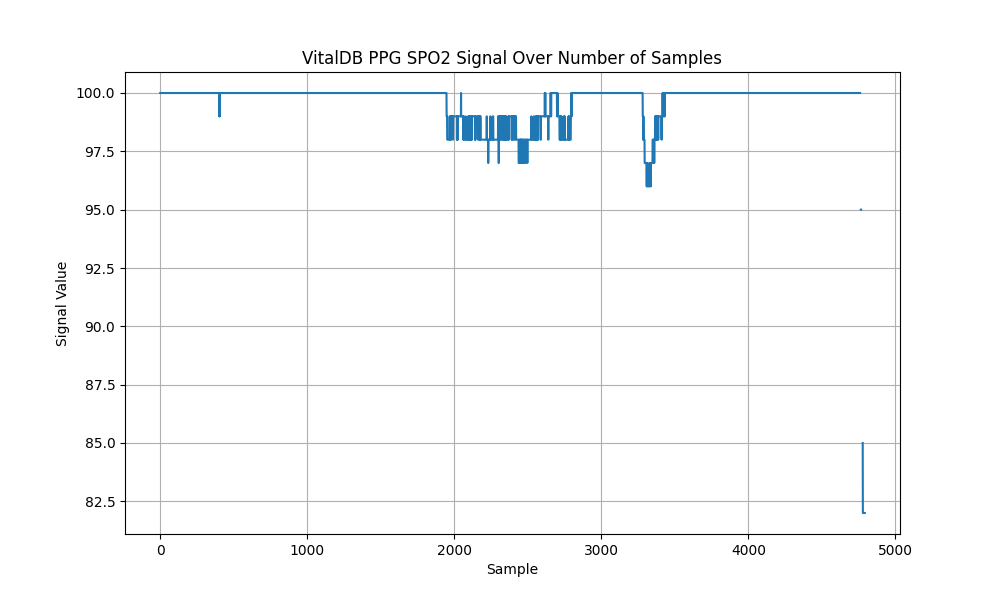

In [69]:
# Load the signal
signal_ppg = vt.load_case(case_id,['Solar8000/PLETH_SPO2'], interval=5)

# Generate the x values (number of samples)
samples_ppg = range(len(signal_ppg))

#print check
print(signal_ppg)
print(samples_ppg)
print(signal_ppg[:10])
print(len(signal_ppg))
print(type(signal_ppg))
print(signal_ppg.size)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(samples_ppg, signal_ppg)
plt.title("VitalDB PPG SPO2 Signal Over Number of Samples")
plt.xlabel("Sample")
plt.ylabel("Signal Value")
plt.grid(True)
plt.show()
